<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/02_pytorch_classification_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02. PyTorch Classification Exercises

The following is a template for 02. PyTorch Classification exercises.

It's only starter code and it's your job to fill in the blanks.

Because of the flexibility of PyTorch, there may be more than one way to answer the question.

Don't worry about trying to be *right* just try writing code that suffices the question.

## Resources
* These exercises are based on [notebook 02 of the learn PyTorch course](https://www.learnpytorch.io/02_pytorch_classification/).
* You can see one form of [solutions on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) (but try the exercises below yourself first!).

In [1]:
# Import torch
import torch

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
# Setup random seed
RANDOM_SEED = 42

Using device: cuda


In [2]:
from sklearn.datasets import make_circles


In [3]:
n_samples = 1000


In [4]:
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=RANDOM_SEED)


In [5]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [6]:
X.shape

(1000, 2)

In [7]:
y.shape

(1000,)

In [8]:
X.T.shape

(2, 1000)

In [9]:
a = torch.rand(size=(2,1))

In [10]:
b = torch.from_numpy(X)

In [11]:
a = a.to(torch.float64)

In [12]:
b.dtype

torch.float64

In [13]:
torch.matmul(b,a).size()

torch.Size([1000, 1])

In [14]:
torch.matmul(b,a) - y

tensor([[-0.4087, -0.4087, -0.4087,  ..., -0.4087,  0.5913,  0.5913],
        [-1.2184, -1.2184, -1.2184,  ..., -1.2184, -0.2184, -0.2184],
        [-1.2278, -1.2278, -1.2278,  ..., -1.2278, -0.2278, -0.2278],
        ...,
        [-1.8535, -1.8535, -1.8535,  ..., -1.8535, -0.8535, -0.8535],
        [-1.4200, -1.4200, -1.4200,  ..., -1.4200, -0.4200, -0.4200],
        [ 0.0729,  0.0729,  0.0729,  ...,  0.0729,  1.0729,  1.0729]],
       dtype=torch.float64)

In [15]:
import pandas as pd


In [16]:
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y
                        })

In [17]:
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


So X1 and X2 for features while label is target

1000, 2 for X

1000, 1 for y

In [18]:
# Check different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

probably (2,n) params for operator where n for hidden variables

2,n and then non linear activation function

In [19]:
# Visualize with a plot
import matplotlib.pyplot as plt

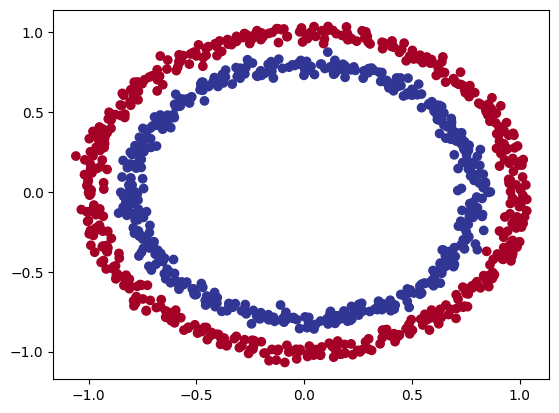

In [20]:
plt.scatter(x=X[:, 0],  # geographic x from the first column of data
            y=X[:, 1],  # geographic y from the second column of data
            c=y, # while red and blue are differed by y labels
            cmap=plt.cm.RdYlBu); # so thus mapped here

In [21]:
print('x shape: ',X.shape)
print('y shape: ',y.shape)

x shape:  (1000, 2)
y shape:  (1000,)


In [22]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


1. Turn our data into tensors (right now our data is in NumPy arrays and PyTorch prefers to work with PyTorch tensors).

2. Split our data into training and test sets (we'll train a model on the training set to learn the patterns between X and y and then evaluate those learned patterns on the test dataset).

In [23]:
print('X type: ',type(X))
print('y type: ', type(y))

X type:  <class 'numpy.ndarray'>
y type:  <class 'numpy.ndarray'>


In [24]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [25]:
print(
    X[:5,:], # == X[:5]
    y[:5]
)

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]]) tensor([1., 1., 1., 1., 0.])


In [26]:
print(X[:5]==X[:5,:])


tensor([[True, True],
        [True, True],
        [True, True],
        [True, True],
        [True, True]])


So data grows <- way

while index goes -> way

Now split

In [27]:
from sklearn.model_selection import train_test_split


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=42)

In [29]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

now build a model


In [30]:
# Standard PyTorch imports
import torch
from torch import nn


Let's create a model class that:

1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).

2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.

3. Defines a forward() method containing the forward pass computation of the model.

4. Instantiates the model class and sends it to the target device.

In [31]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
    self.layer_1 = nn.Linear(in_features=2, out_features=5) # as the X has a shape of 1000, 2 so there are two features input features are 2
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # hidden to output shape
  # 3. Define a forward method containing the forward pass computation
  def forward(self, x):
    # Return the output of layer_2, a single feature, the same shape as y
    return self.layer_2(self.layer_1(x))

In [32]:
# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)

In [33]:
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

You can also do the same as above using nn.Sequential.


nn.Sequential performs a forward pass computation of the input data through the layers in the order they appear.

In [34]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)


In [35]:
model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

nn.Sequential is fantastic for straight-forward computations, however, as the namespace says, it always runs in sequential order.

So if you'd something else to happen (rather than just straight-forward sequential computation) you'll want to define your own custom nn.Module subclass.

In [36]:
# Make predictions with the model
untrained_preds = model_0(X_train.to(device))

In [37]:
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 800, Shape: torch.Size([800, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[ 0.3712],
        [ 0.4227],
        [-0.0086],
        [ 0.0205],
        [-0.0456],
        [ 0.0864],
        [-0.0647],
        [ 0.1563],
        [-0.1194],
        [ 0.4239]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


Setup loss function and optimizer

object -> measure -> data -> EDA(data) for statistical model -> loss(target, model(data)) -> update by an optimizer

PyTorch has two binary cross entropy implementations:

1. torch.nn.BCELoss() - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. torch.nn.BCEWithLogitsLoss() - This is the same as above except it has a sigmoid layer (nn.Sigmoid) built-in (we'll see what this means soon).

The documentation for **torch.nn.BCEWithLogitsLoss() states that it's more numerically stable** than using torch.nn.BCELoss() after a nn.Sigmoid layer.

**So generally, implementation 2 is a better option.** However for advanced usage, you may want to separate the combination of nn.Sigmoid and torch.nn.BCELoss() but that is beyond the scope of this notebook.

In [38]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss == no signmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitLoss == sigmoid built-in


In [39]:
# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


Now let's also create an **evaluation metric**.

If a *loss function measures how wrong* your model is, I like to think of *evaluation metrics as measuring how right it is*.

In [40]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100 # how much of right ones are there
  return acc

1. Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).

2. Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

3. Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

4. Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

5. Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).

Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [41]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0598],
        [-0.0455],
        [ 0.0879],
        [-0.1025],
        [ 0.3821]], device='cuda:0', grad_fn=<SliceBackward0>)

The raw outputs (unmodified) of this equation (y
�
) and in turn, the raw outputs of our model are often referred to as **logits**.

In [42]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)

In [43]:
print(
y_pred_probs

)

tensor([[0.4850],
        [0.4886],
        [0.5220],
        [0.4744],
        [0.5944]], device='cuda:0', grad_fn=<SigmoidBackward0>)


They're now in the form of prediction probabilities (I usually refer to these as y_pred_probs), in other words, the values are now how much the model thinks the data point belongs to one class or another.

So these values can be viewed as a decision boundary.

The closer to 0, the more the model thinks the sample belongs to class 0, the closer to 1, the more the model thinks the sample belongs to class 1.

More specificially:

If y_pred_probs >= 0.5, y=1 (class 1)

If y_pred_probs < 0.5, y=0 (class 0)

To turn **our prediction probabilities in prediction labels,** we can **round the outputs of the sigmoid** activation function.

In [44]:
# FInd the predicted labels (round the predicti0on probabilities)
y_preds = torch.round(y_pred_probs)

# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)))[:5]) # logit -> activation

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [45]:
y_test[:5]


tensor([1., 0., 1., 0., 1.])

Note: The use of the sigmoid activation function is often only for binary classification logits. For multi-class classification, we'll be looking at using the **softmax activation function(Gibbs Ensemble)** (this will come later on).

And the use of the sigmoid activation function is not required when passing our model's raw outputs to the nn.BCEWithLogitsLoss (the "logits" in logits loss is because it works on the model's raw logits output), this is because it has a sigmoid function built-in.

Building a training and testing loop

In [46]:
torch.manual_seed(42)
epochs = 100

In [47]:
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)

X_test, y_test = X_test.to(device), y_test.to(device)

In [48]:
# Build training and evaluation loop
for epoch in range(epochs):
  #### Training
  model_0.train()

  # 1. Forward pass (model outputs raw logits)
  y_logits = model_0(X_train).squeeze( ) # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device as it has one feature
  y_pred = torch.round(torch.sigmoid(y_logits)) # since I did not add activation function on that class

  # 2. Calculate loss/accuracy
  # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
  #                y_train)

  loss = loss_fn(y_logits, # using y_logits for loss function was already with sigmoid
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. backward propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  #### Testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # if I used sigmoid inside of class model itself then I cannot use BCEWithLogitLoss
    # 2. Caculate loss/accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70090, Accuracy: 51.88% | Test loss: 0.69625, Test acc: 56.50%
Epoch: 10 | Loss: 0.69703, Accuracy: 51.25% | Test loss: 0.69367, Test acc: 51.50%
Epoch: 20 | Loss: 0.69564, Accuracy: 50.75% | Test loss: 0.69300, Test acc: 47.50%
Epoch: 30 | Loss: 0.69498, Accuracy: 50.62% | Test loss: 0.69286, Test acc: 49.50%
Epoch: 40 | Loss: 0.69458, Accuracy: 50.12% | Test loss: 0.69286, Test acc: 49.00%
Epoch: 50 | Loss: 0.69428, Accuracy: 49.88% | Test loss: 0.69292, Test acc: 48.50%
Epoch: 60 | Loss: 0.69405, Accuracy: 50.00% | Test loss: 0.69300, Test acc: 48.50%
Epoch: 70 | Loss: 0.69386, Accuracy: 49.75% | Test loss: 0.69309, Test acc: 47.00%
Epoch: 80 | Loss: 0.69371, Accuracy: 50.38% | Test loss: 0.69318, Test acc: 46.50%
Epoch: 90 | Loss: 0.69358, Accuracy: 50.50% | Test loss: 0.69327, Test acc: 46.00%


The accuracy barely moves above 50% on each data split.

And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

Make predictions and evaluate the model

In [49]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [50]:
from helper_functions import plot_predictions, plot_decision_boundary


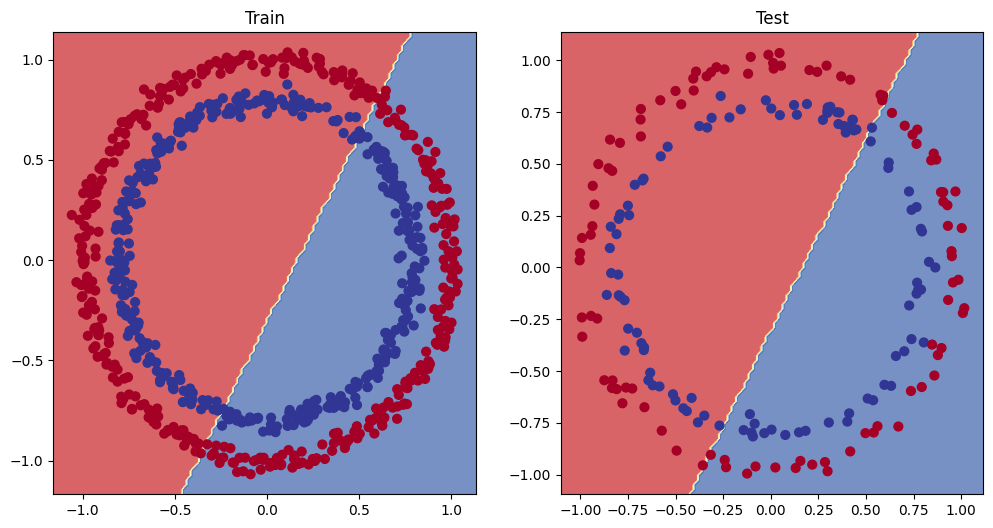

In [51]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Since the model uses linear filters so this happens

## Improving a model (from a model perspective)

Model improvement technique*

What does it do?

Add more layers

Each layer potentially increases the learning capabilities of the model with each layer being able to learn some kind of new pattern in the data, more layers is often referred to as making your neural network deeper.

Add more hidden units

Similar to the above, more hidden units per layer means a potential increase in learning capabilities of the model, more hidden units is often referred to as making your neural network wider.

Fitting for longer (more epochs)

Your model might learn more if it had more opportunities to look at the data.
Changing the activation functions	Some data just can't be fit with only straight lines (like what we've seen), using non-linear activation functions can help with this (hint, hint).

Change the learning rate

Less model specific, but still related, the learning rate of the optimizer decides how much a model should change its parameters each step, too much and the model overcorrects, too little and it doesn't learn enough.

Change the loss function

Again, less model specific but still important, different problems require different loss functions. For example, a binary cross entropy loss function won't work with a multi-class classification problem.

Use transfer learning

Take a pretrained model from a problem domain similar to yours and adjust it to your own problem. We cover transfer learning in notebook 06.

Note: *because you can adjust all of these by hand, they're referred to as hyperparameters.

And this is also where machine learning's half art half science comes in, there's no real way to know here what the best combination of values is for your project, best to follow the data scientist's motto of "experiment, experiment, experiment".

In [52]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10) # layer which takes n,2 and outputs n,10 so (n,2)@(2,10) => (n,10) thus linear here is just 2,10 matrix
    self.layer_2 = nn.Linear(in_features=10, out_features=10) # so 10,10 matrix here
    self.layer_3 = nn.Linear(in_features=10, out_features=1) # but then as matrix multiplication is linear operation all three means just (2,1) = (2,10)(10,10)(10,1)

  def forward(self, x): # note: always make sure forward is spelt correctly!
    z = self.layer_1(x)
    z = self.layer_2(z)
    z = self.layer_3(z)
    return z


In [53]:
model_1 = CircleModelV1().to(device)


In [54]:
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [55]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input so for accuracy one should do sigmoid on the logit by himself
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)


In [56]:
torch.manual_seed(42)


In [57]:
epochs = 1000


In [58]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [59]:
for epoch in range(epochs):
  #### Training
  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction

  # 2. Calculate loss/ accuracy where accuracy for evaluation function
  loss = loss_fn(y_logits, y_train) # logits put there since loss_fn was BCEWithLogitsLoss
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backward propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  #### Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forawrd pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss / accuracy
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    # Print out what's happening every 100 epoches
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test loss: 0.69468, Test acc: 46.00%


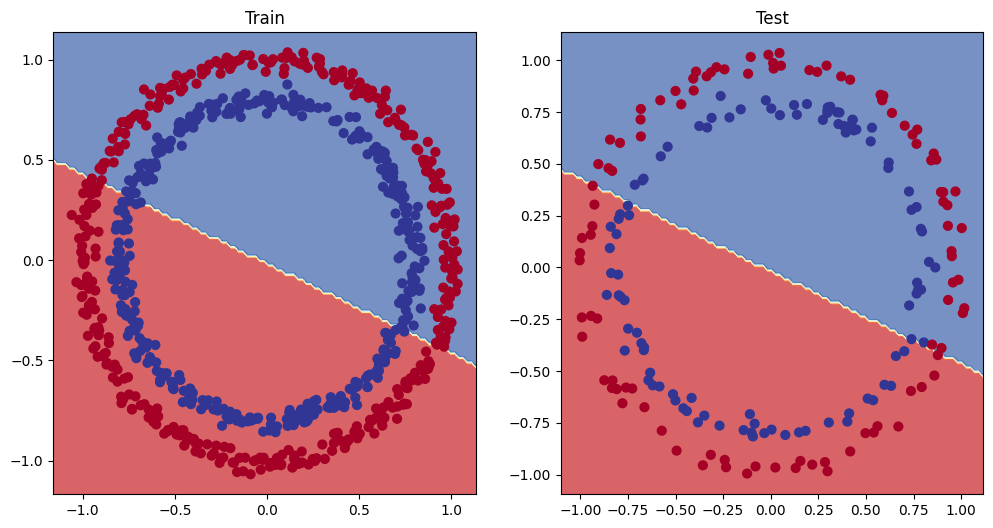

In [60]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

Obviously nothing changes since all the layers are still linear

## Preparing data to see if our model can model a straight line

In [61]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [62]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


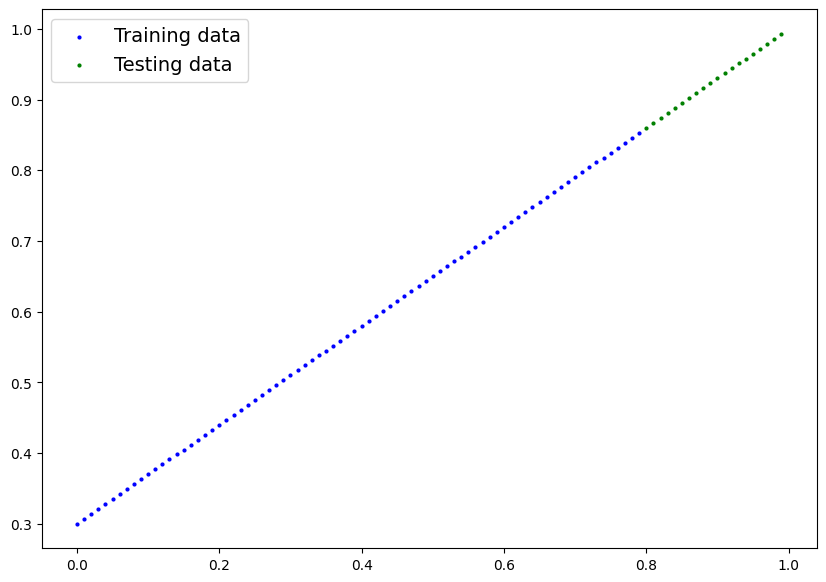

In [63]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);


## Adjusting model_1 to fit a straight line

In [64]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)


In [65]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [66]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [67]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [68]:
torch.manual_seed(42)


In [69]:
epochs = 1000


In [70]:
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

In [71]:
for epoch in range(epochs):
  #### Training
  # 1. Forward pass
  y_pred = model_2(X_train_regression)

  # 2. Calculate loss
  loss = loss_fn(y_pred, y_train_regression)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backward Propagation
  loss.backward()

  # Optimizer step
  optimizer.step()

  #### Testing
  model_2.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_pred = model_2(X_test_regression)
    # 2. Calcualte the loss
    test_loss = loss_fn(test_pred, y_test_regression)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 100 | Train loss: 0.09309, Test loss: 0.02901
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 300 | Train loss: 0.06745, Test loss: 0.00615
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 500 | Train loss: 0.05698, Test loss: 0.01061
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 700 | Train loss: 0.06109, Test loss: 0.02127
Epoch: 800 | Train loss: 0.05599, Test loss: 0.01426
Epoch: 900 | Train loss: 0.05571, Test loss: 0.00603


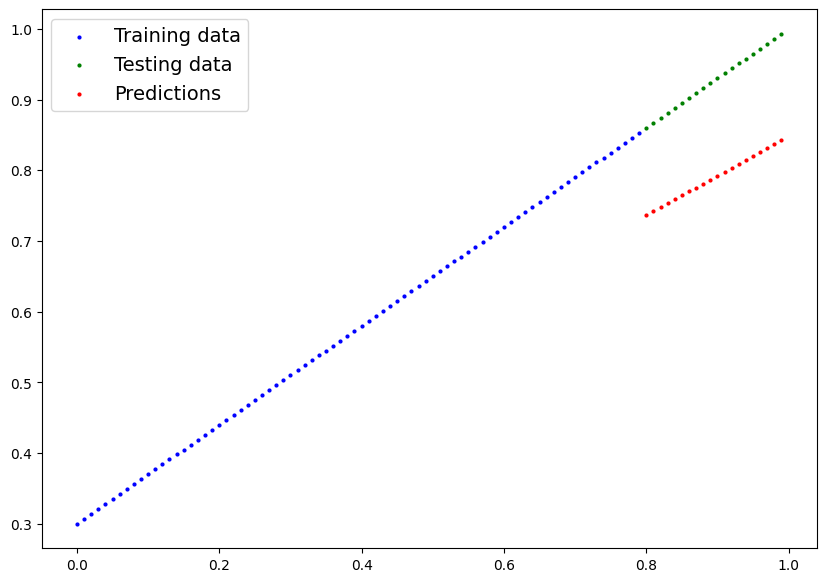

In [72]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Note: A helpful troubleshooting step when building deep learning models is to start as small as possible to see if the model works before scaling it up.

This could mean starting with a simple neural network (not many layers, not many hidden neurons) and a small dataset (like the one we've made) and then overfitting (making the model perform too well) on that small example before increasing the amount data or the model size/design to reduce overfitting.

## The missing piece: non-linearity

### Recreating non-linear data (red and blue circles)

In [73]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [74]:
n_samples = 1000


In [75]:
X, y = make_circles(n_samples=n_samples,
                    noise=0.03,
                    random_state=42,)


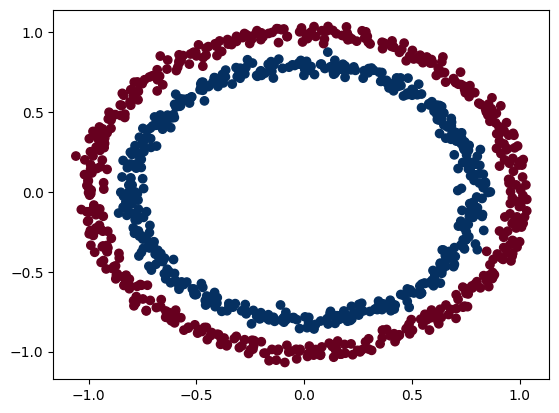

In [76]:
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdBu) # All rows first column for x second column for y and color for y


In [77]:
import torch
from sklearn.model_selection import train_test_split

In [78]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X,
                 y,
                 test_size=0.2,
                 random_state=42)

In [80]:
X_train[:5], y_train[:5] # 5 row values for all columns


(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [81]:
X.size() # data have two features that is x_1 x_2 for geographical axes


torch.Size([1000, 2])

### Building a model with non-linearity

PyTorch has a bunch of ready-made non-linear activation functions that do similiar but different things.

One of the most common and best performing is ReLU (rectified linear-unit, torch.nn.ReLU()).

ReLU(f(x)) when f(x) =< 0 then it just outputs 0 so if y = x and then y = 2x + 1

y = x until x = 4

for x > 4 y = 2x + y_0

then

y = x and y = 2x + y_0 at x = 4

ReLU(y_second(x)) where x =< 2

gets zero


In [82]:
# Build model with non-linear activation function
from torch import nn

In [83]:
class CircleModel_V2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # <- add in ReLU activation function
    # Can also put sigmoid in the model
    # This would mean you don't need to use it on the predictions
    # self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    # Intersperse the ReLU activation function between layers
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)

    return z

In [84]:
model_3 = CircleModel_V2().to(device)


In [85]:
print(model_3)


CircleModel_V2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [86]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### Training a model with non-linearity

In [87]:
# Fit the model
torch.manual_seed(42)

In [88]:
epochs = 1000


In [89]:
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [90]:
X_train.size(), y_train.size()
X_test.size(), y_test.size()

(torch.Size([200, 2]), torch.Size([200]))

In [91]:
for epoch in range(epochs):
  # 1. Forward pass
  y_logits = model_3(X_train).squeeze() # since classification with just one feature y
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calcualte loss and accuracy
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
  acc = accuracy_fn(y_true = y_train,
                    y_pred = y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backward propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  #### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction
    # 2. Calculate loss and accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%


### Evaluating a model trained with non-linear activation functions

In [92]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels


(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

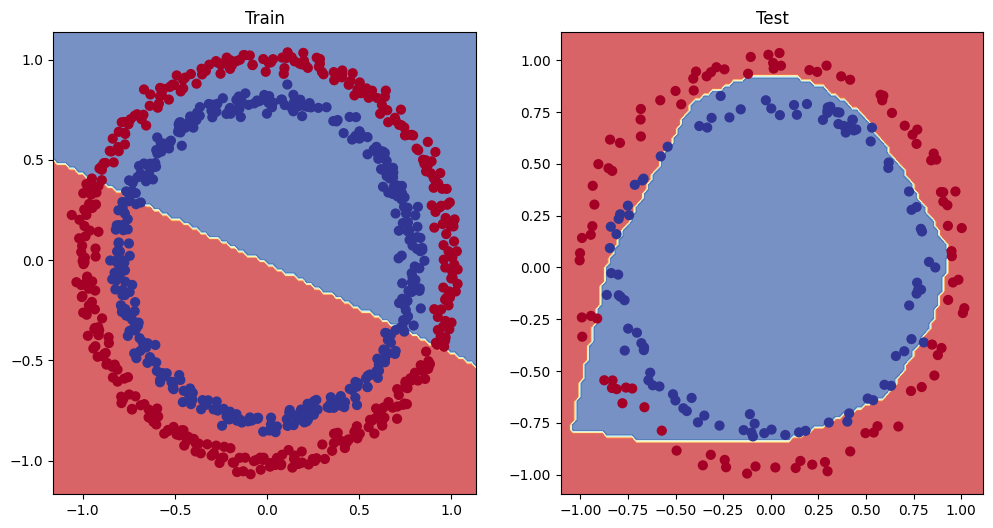

In [93]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## Replicating non-linear activation functions

Note: Much of the data you'll encounter in the wild is non-linear (or a combination of linear and non-linear). Right now we've been working with dots on a 2D plot. But imagine if you had images of plants you'd like to classify, there's a lot of different plant shapes. Or text from Wikipedia you'd like to summarize, there's lots of different ways words can be put together (linear and non-linear patterns).

In [94]:
# Create a toy tensor
A = torch.arange(start=-10, end=10, step=1, dtype=torch.float32)

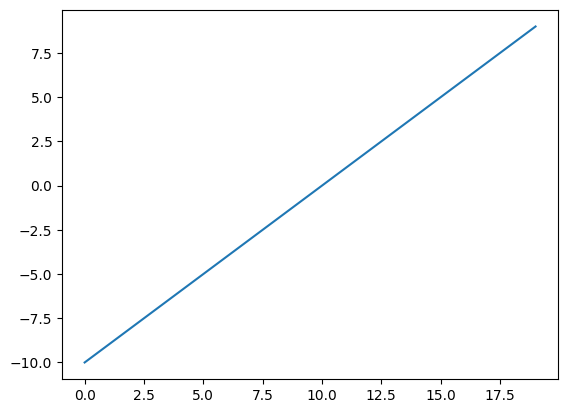

In [95]:
# Visualize the toy tensor
plt.plot(A);

The ReLU function turns all negatives to 0 and leaves the positive values as they are.

In [96]:
# Create ReLU function by hand
def relu(x):
  return torch.maximum(torch.tensor(0), x) # inputs must be tensors


In [97]:
# Pass toy tensor through ReLU function
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

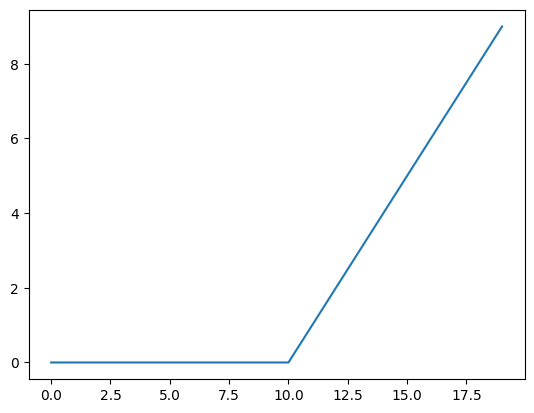

In [98]:
# Plot ReLU activated toy tensor
plt.plot(relu(A));

In [99]:
# Create a custom sigmoid function
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


In [100]:
# Test custom sigmoid on toy tensor
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

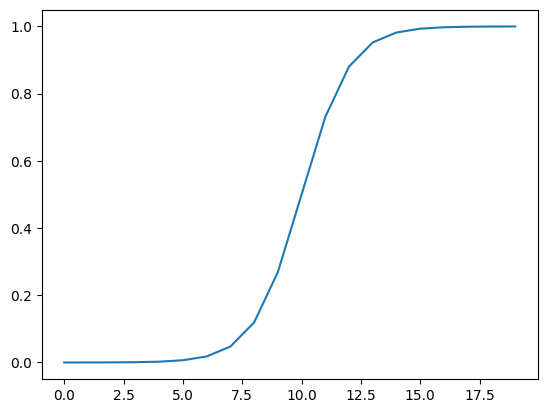

In [101]:
# Plot sigmoid activated toy tensor
plt.plot(sigmoid(A));

## Putting things together by building a multi-class PyTorch model

### Creating mutli-class classification data

1. Create some multi-class data with make_blobs().
2. Turn the data into tensors (the default of make_blobs() is to use NumPy arrays).
3. Split the data into training and test sets using train_test_split().
4. Visualize the data.

In [52]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [53]:
#Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [54]:
# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES, # X features
                            centers=NUM_CLASSES, # y labels
                            cluster_std = 1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
                            random_state = RANDOM_SEED
)


In [55]:
# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


In [111]:
# 3. Split into train and test sets

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

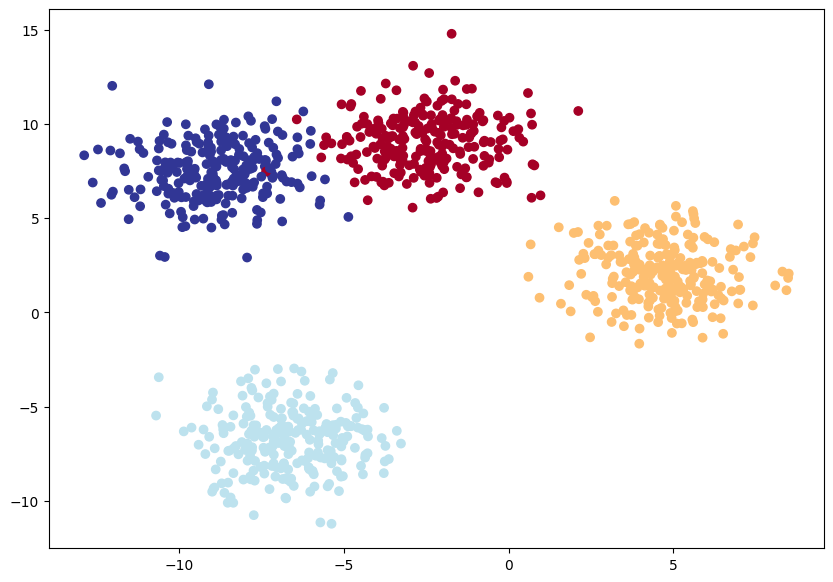

In [114]:
# 4. Plot data
plt.figure(figsize=(10,7))

plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

Question: Does this dataset need non-linearity? Or could you draw a succession of straight lines to separate it?

Probably two linear lines are just okay ??

### Building a multi-class classification model in PyTorch

How about we build one similar to model_3 but this still capable of handling multi-class data?

To do so, let's create a subclass of nn.Module that takes in three hyperparameters:

* input_features - the number of X features coming into the model.
* output_features - the ideal numbers of output features we'd like (this will be equivalent to NUM_CLASSES or the number of classes in your multi-class classification problem).
* hidden_units - the number of hidden neurons we'd like each hidden layer to use.

Since we're putting things together, let's setup some device agnostic code (we don't have to do this again in the same notebook, it's only a reminder).

So X of n,features -> features, hidden -> hidden, hidden -> hidden, output_feaatures

In [115]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [116]:
from torch import nn


In [117]:
# Build model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does this data require non-linear layers?
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does this data require non-linear layers?
            nn.Linear(in_features=hidden_units, out_features=output_features)
         )
  def forward(self, x):
    return self.linear_layer_stack(x)


In [118]:
# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)

In [119]:
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Creating a loss function and optimizer for a multi-class PyTorch model

In [120]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(),
                            lr=0.1) # excercise: try changing the learning rate

### Getting prediction probabilities for a multi-class PyTorch model

In [121]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5] # since model_4 is in the device

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        [ 1.9576,  0.3125,  2.2244,  1.1324],
        [ 0.5458, -1.2381,  0.4441,  1.1804]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [122]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

so each row is compared to target

as (instance,feature)->(in=feature,out=class)-> (class)

then the values one gets is (instance,class) while the params one will get has (feature,class)

How do we go from logits -> prediction probabilities -> prediction labels just like we did with the binary classification problem?

In [123]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across diemension 1 to get prediction
y_pred_probs = torch.softmax(y_logits, dim=1) # like sigmoid in BC

print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [124]:
# Sum the fiirst sample output of the softmax activation function
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

These prediction probablities are essentially saying how much the model thinks the target X sample (the input) maps to each class.

Since there's one value for each class in y_pred_probs, the index of the highest value is the class the model thinks the specific data sample most belongs to.

We can check which index has the highest value using torch.argmax()

In [125]:
# Which class does the model think is *most* likely at the index 0 sample?

print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1872, 0.2918, 0.1495, 0.3715], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


You can see the output of torch.argmax() returns 3, so for the features (X) of the sample at index 0, the model is predicting that the most likely class value (y) is 3.

Of course, right now this is just random guessing so it's got a 25% chance of being right (since there's four classes). But we can improve those chances by training the model.

### Creating a training and testing loop for a multi-class PyTorch model

In [126]:
torch.manual_seed(42)


In [127]:
# Set number of epochs
epochs = 100

In [128]:
# Put the data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)


In [129]:
for epoch in range(epochs):
  #### Training
  model_4.train()

  # 1. Forward pass
  y_logits = model_4(X_blob_train) # model outputs raw logits
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels, out of four classes only one should be choosen
  # print(y_logits)
  # 2. Calculate loss and accuracy
  loss = loss_fn(y_logits, y_blob_train) # since feature data itself is not probability
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  # 3. Optimizer sero grad
  optimizer.zero_grad()

  # 4. Backward propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  #### Testing
  model_4.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Calculate test loss and accuracy
    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)

  # Print out what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.04324, Acc: 65.50 | Test Loss: 0.57861, Test Acc: 95.50%
Epoch: 10 | Loss: 0.14398, Acc: 99.12 | Test Loss: 0.13037, Test Acc: 99.00%
Epoch: 20 | Loss: 0.08062, Acc: 99.12 | Test Loss: 0.07216, Test Acc: 99.50%
Epoch: 30 | Loss: 0.05924, Acc: 99.12 | Test Loss: 0.05133, Test Acc: 99.50%
Epoch: 40 | Loss: 0.04892, Acc: 99.00 | Test Loss: 0.04098, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04295, Acc: 99.00 | Test Loss: 0.03486, Test Acc: 99.50%
Epoch: 60 | Loss: 0.03910, Acc: 99.00 | Test Loss: 0.03083, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03643, Acc: 99.00 | Test Loss: 0.02799, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03448, Acc: 99.00 | Test Loss: 0.02587, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03300, Acc: 99.12 | Test Loss: 0.02423, Test Acc: 99.50%


### Making and evaluating predictions with a PyTorch multi-class model

In [130]:
# Make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

# View the first 10 predictions

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

Let's convert our model's prediction logits to prediction probabilities (using torch.softmax()) then to prediction labels (by taking the argmax() of each sample).

Note: It's possible to skip the torch.softmax() function and go straight from predicted logits -> predicted labels by calling torch.argmax() directly on the logits.

For example, y_preds = torch.argmax(y_logits, dim=1), this saves a computation step (no torch.softmax()) but results in no prediction probabilities being available to use.

In [131]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")


Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


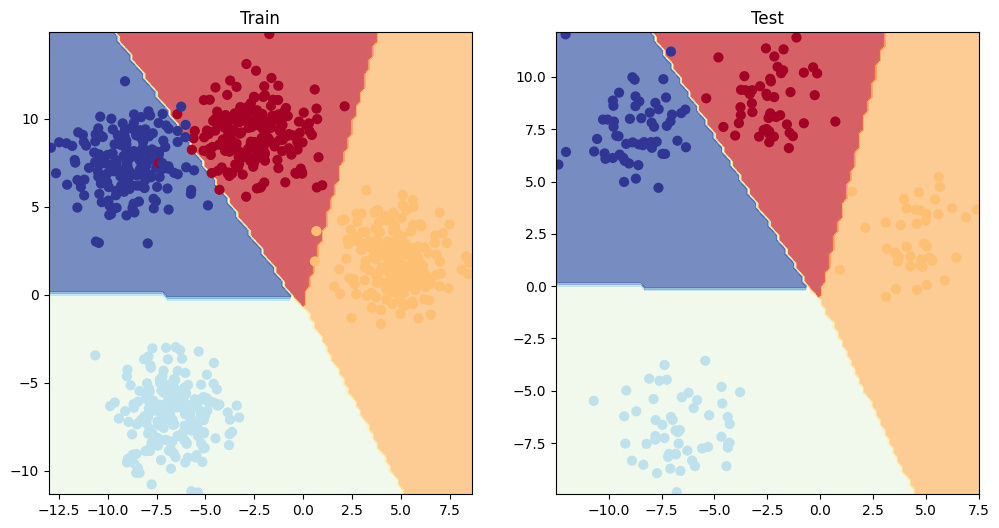

In [132]:
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)


Scikit-Learn (a popular and world-class machine learning library) has many implementations of the above metrics and you're looking for a PyTorch-like version, check out TorchMetrics, especially the TorchMetrics classification section.

In [134]:
try:
    from torchmetrics import Accuracy
except:
    !pip install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 kB 3.6 MB/s eta 0:00:00


In [135]:
# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)


tensor(0.9950, device='cuda:0')

## 1. Make a binary classification dataset with Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function.
  * For consistency, the dataset should have 1000 samples and a `random_state=42`.
  * Turn the data into PyTorch tensors.
  * Split the data into training and test sets using `train_test_split` with 80% training and 20% testing.

In [1]:
import torch
from torch import nn

In [2]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Setup random seed
RANDOM_SEED = 42

Using device: cuda


In [3]:
sample_size = 1000


In [124]:
# Create a dataset with Scikit-Learn's make_moons()
from sklearn.datasets import make_moons

In [125]:
X, y = make_moons(n_samples=sample_size,
           noise=0.03,
           random_state=RANDOM_SEED)


In [126]:
print('X shape: ', X.shape, '\ny shape: ', y.shape)

X shape:  (1000, 2) 
y shape:  (1000,)


Thus X has two features that is intepretable as x,y geometiric plane

In [127]:
# Turn data into a DataFrame
import pandas as pd


In [128]:
moons = pd.DataFrame(
    {"X1": X[:,0], # first feature
     "X2": X[:,1], # second feature
     "label": y}
)


In [129]:
moons.head(10)

,X1,X2,label
0,-0.009332,0.390981,1
1,0.954574,-0.473756,1
2,0.918526,-0.425196,1
3,0.412768,-0.376385,1
4,-0.845320,0.528799,0
5,0.579542,-0.352979,1
6,0.294884,-0.209238,1
7,-0.014488,0.435896,1
8,1.626510,-0.281207,1
9,0.671598,0.786422,0


In [130]:
moons.label.value_counts()


1    500
0    500
Name: label, dtype: int64

Balanced dataset

In [131]:
# Visualize the data on a scatter plot
import matplotlib.pyplot as plt

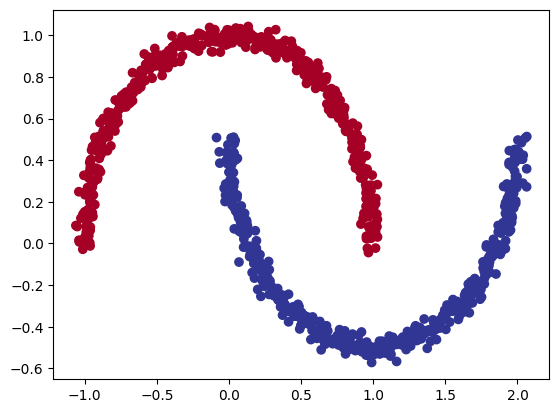

In [132]:
plt.scatter(
    x=moons.X1,
    y=moons.X2,
    c=moons.label,
    cmap=plt.cm.RdYlBu
);

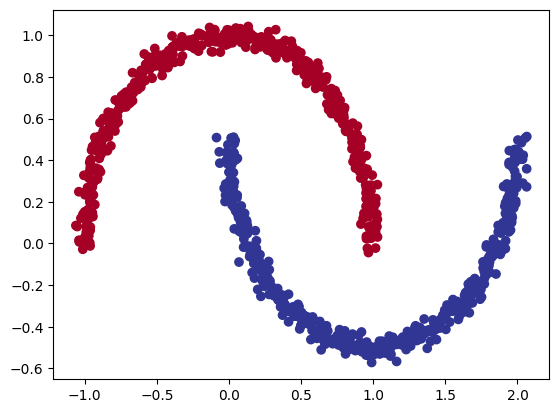

In [133]:
plt.scatter(
    x=X[:,0], # all instance of first feature
    y=X[:,1], # all instance of second feature
    c=y, # classification given by y
    cmap=plt.cm.RdYlBu
)

In [134]:
# Turn data into tensors of dtype float
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


In [135]:
# Split the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [137]:
len(X_train), len(X_test), len(y_train), len(y_test)


(800, 200, 800, 200)

## 2. Build a model by subclassing `nn.Module` that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
  * Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [138]:
# Inherit from nn.Module to make a model capable of fitting the mooon data
class MoonModelV0(nn.Module):
    ## Your code here ##
    def __init__(self, input_features, output_features, hidden_units=8):
      super().__init__()
      self.linear_1 = nn.Linear(in_features=input_features, out_features=hidden_units)
      self.linear_2 = nn.Linear(in_features=hidden_units, out_features=hidden_units)
      self.linear_3 = nn.Linear(in_features=hidden_units, out_features=output_features) # so when model(data).shape = (1000,2)(2,8)(8,8)(8,1) where (8,8) square matrix and then (1000,1) for output
      self.relu = nn.ReLU()

    def forward(self, x):
        ## Your code here ##
        z = self.linear_1(x)
        z = self.relu(z)
        z = self.linear_2(z)
        z = self.relu(z)
        z = self.linear_3(z)

        return z

# Instantiate the model
## Your code here ##

In [139]:
moonModel_0 = MoonModelV0(
    input_features = 2,
    output_features = 1,
    hidden_units = 8,
).to(device)


In [140]:
print(moonModel_0)


MoonModelV0(
  (linear_1): Linear(in_features=2, out_features=8, bias=True)
  (linear_2): Linear(in_features=8, out_features=8, bias=True)
  (linear_3): Linear(in_features=8, out_features=1, bias=True)
  (relu): ReLU()
)


## 3. Setup a binary classification compatible loss function and optimizer to use when training the model built in 2.

In [141]:
# Setup loss function
loss_fn = nn.BCEWithLogitsLoss()
# Setup optimizer to optimize model's parameters
optimizer = torch.optim.SGD(params=moonModel_0.parameters(),
                            lr=0.1)


In [142]:
# Calculate accuracy (a classification evaluation metric)
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc


## 4. Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
  * Do a forward pass of the model to see what's coming out in the form of logits, prediction probabilities and labels.
  * To measure model accuray, you can create your own accuracy function or use the accuracy function in [TorchMetrics](https://torchmetrics.readthedocs.io/en/latest/).
  * Train the model for long enough for it to reach over 96% accuracy.
  * The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [143]:
# What's coming out of our model?
y_logits = moonModel_0(X_train.to(device))[:6]

In [144]:
print(y_logits)


tensor([[-0.3684],
        [-0.0690],
        [-0.1062],
        [-0.1045],
        [-0.0955],
        [-0.1019]], device='cuda:0', grad_fn=<SliceBackward0>)


In [145]:
# logits (raw outputs of model)
print("Logits:", y_logits)

Logits: tensor([[-0.3684],
        [-0.0690],
        [-0.1062],
        [-0.1045],
        [-0.0955],
        [-0.1019]], device='cuda:0', grad_fn=<SliceBackward0>)


In [146]:
y_pred_probs = torch.sigmoid(y_logits)[:6]


In [147]:
print(y_pred_probs)


tensor([[0.4089],
        [0.4828],
        [0.4735],
        [0.4739],
        [0.4761],
        [0.4746]], device='cuda:0', grad_fn=<SliceBackward0>)


In [148]:
# Prediction probabilities
print("Pred probs:", y_pred_probs)

Pred probs: tensor([[0.4089],
        [0.4828],
        [0.4735],
        [0.4739],
        [0.4761],
        [0.4746]], device='cuda:0', grad_fn=<SliceBackward0>)


In [149]:
y_pred_labels = torch.round(torch.sigmoid(moonModel_0(X_train.to(device))))[:6]


In [150]:
# Prediction labels
print("Pred labels:", y_pred_labels)

Pred labels: tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0', grad_fn=<SliceBackward0>)


In [151]:
# Let's calculuate the accuracy using accuracy from TorchMetrics
!pip -q install torchmetrics # Colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: Uncomment this code to use the Accuracy function
acc_fn = Accuracy(task="multiclass", num_classes=2).to(device) # send accuracy function to device
# acc_fn

In [152]:
## TODO: Uncomment this to set the seed
torch.manual_seed(RANDOM_SEED)

In [153]:
epochs = 1000


In [154]:
# Send data to the device
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [155]:
# Loop through the data
for epoch in range(epochs):
  ### Training

  # 1. Forward pass (logits output)
  y_logits = moonModel_0(X_train).squeeze() # since output has only one feature, not multiclass

  # Turn logits into prediction probabilities
  y_prob = torch.sigmoid(y_logits)

  # Turn prediction probabilities into prediction labels
  y_pred = torch.round(y_prob)

  # 2. Calculaute the loss
  loss = loss_fn(y_logits, y_train) # loss = compare model raw outputs to desired model outputs

  # Calculate the accuracy
  acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels

  # 3. Zero the gradients
  optimizer.zero_grad()

  # 4. Loss backward (perform backpropagation) - https://brilliant.org/wiki/backpropagation/#:~:text=Backpropagation%2C%20short%20for%20%22backward%20propagation,to%20the%20neural%20network's%20weights.
  loss.backward()

  # 5. Step the optimizer (gradient descent) - https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21#:~:text=Gradient%20descent%20(GD)%20is%20an,e.g.%20in%20a%20linear%20regression)
  optimizer.step()

  ### Testing
  moonModel_0.eval()
  with torch.inference_mode():
    # 1. Forward pass (to get the logits)
    test_logits = moonModel_0(X_test).squeeze()

    # Turn the test logits into prediction labels
    test_pred = torch.round(torch.sigmoid(test_logits))


    # 2. Caculate the test loss/acc
    test_loss = loss_fn(test_logits, y_test)

    test_acc = acc_fn(test_pred, y_test.int()) # here pred is int so int


  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.71197, Accuracy: 0.50% | Test loss: 0.70553, Test acc: 0.50%
Epoch: 100 | Loss: 0.36094, Accuracy: 0.85% | Test loss: 0.37427, Test acc: 0.83%
Epoch: 200 | Loss: 0.23891, Accuracy: 0.89% | Test loss: 0.23956, Test acc: 0.90%
Epoch: 300 | Loss: 0.21818, Accuracy: 0.90% | Test loss: 0.21428, Test acc: 0.91%
Epoch: 400 | Loss: 0.19766, Accuracy: 0.91% | Test loss: 0.19220, Test acc: 0.92%
Epoch: 500 | Loss: 0.16549, Accuracy: 0.92% | Test loss: 0.15952, Test acc: 0.93%
Epoch: 600 | Loss: 0.12185, Accuracy: 0.95% | Test loss: 0.11589, Test acc: 0.97%
Epoch: 700 | Loss: 0.07915, Accuracy: 0.98% | Test loss: 0.07359, Test acc: 0.99%
Epoch: 800 | Loss: 0.04976, Accuracy: 1.00% | Test loss: 0.04512, Test acc: 1.00%
Epoch: 900 | Loss: 0.03289, Accuracy: 1.00% | Test loss: 0.02925, Test acc: 1.00%


## 5. Make predictions with your trained model and plot them using the `plot_decision_boundary()` function created in this notebook.

In [37]:
# Plot the model predictions
import numpy as np

def plot_decision_boundary(model, X, y):

    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101),
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

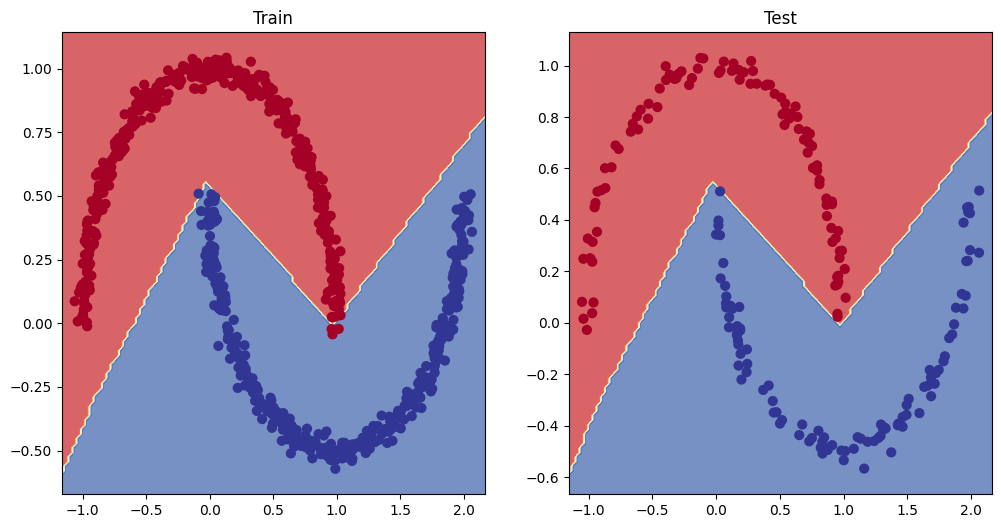

In [38]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(moonModel_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(moonModel_0, X_test, y_test)

## 6. Replicate the Tanh (hyperbolic tangent) activation function in pure PyTorch.
  * Feel free to reference the [ML cheatsheet website](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#tanh) for the formula.

In [39]:
# Create a straight line tensor
A = torch.arange(start=-10, end=10, step=0.5, dtype=torch.float32)

In [40]:
A


tensor([-10.0000,  -9.5000,  -9.0000,  -8.5000,  -8.0000,  -7.5000,  -7.0000,
         -6.5000,  -6.0000,  -5.5000,  -5.0000,  -4.5000,  -4.0000,  -3.5000,
         -3.0000,  -2.5000,  -2.0000,  -1.5000,  -1.0000,  -0.5000,   0.0000,
          0.5000,   1.0000,   1.5000,   2.0000,   2.5000,   3.0000,   3.5000,
          4.0000,   4.5000,   5.0000,   5.5000,   6.0000,   6.5000,   7.0000,
          7.5000,   8.0000,   8.5000,   9.0000,   9.5000])

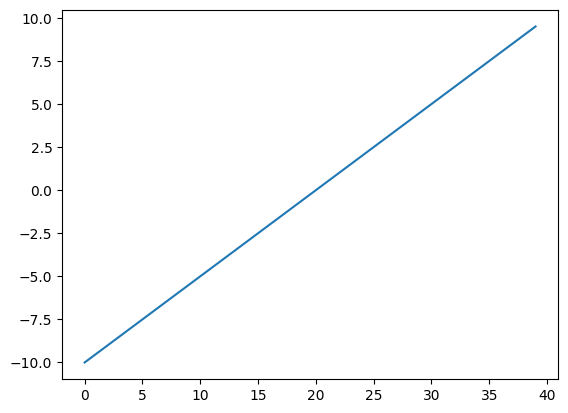

In [41]:
plt.plot(A)


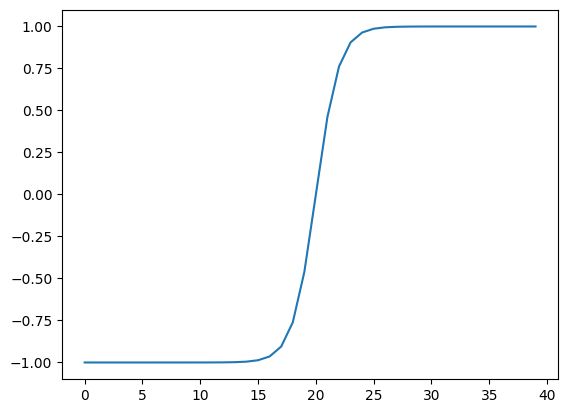

In [42]:
# Test torch.tanh() on the tensor and plot it
plt.plot(torch.tanh(A))

In [43]:
# Replicate torch.tanh() and plot it

def tanh(z):
  return (torch.exp(z) - torch.exp(-z))/ (torch.exp(z) + torch.exp(-z))

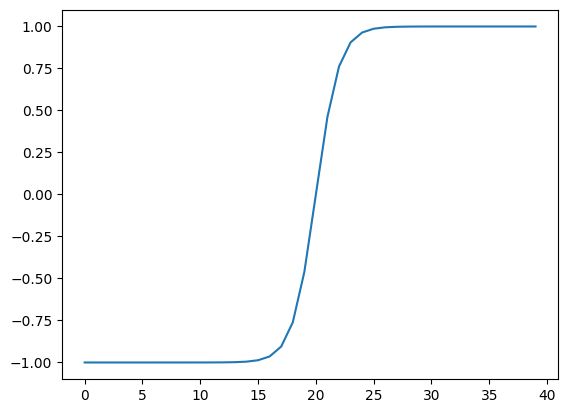

In [44]:
# Test torch.tanh() on the tensor and plot it
plt.plot(tanh(A))

## 7. Create a multi-class dataset using the [spirals data creation function from CS231n](https://cs231n.github.io/neural-networks-case-study/) (see below for the code).
  * Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
  * Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
  * Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
  * Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like) - 1000 epochs should be plenty.
  * Plot the decision boundaries on the spirals dataset from your model predictions, the `plot_decision_boundary()` function should work for this dataset too.

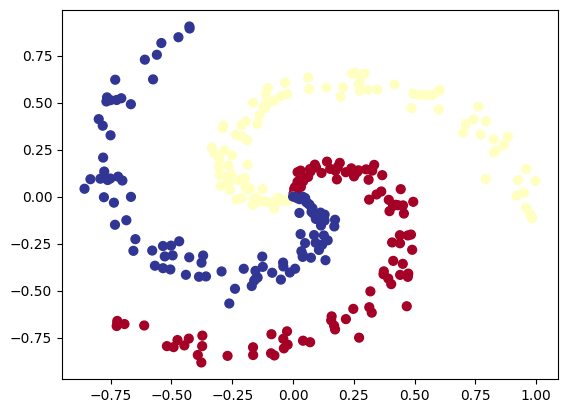

In [191]:
# Code for creating a spiral dataset from CS231n
import numpy as np
import matplotlib.pyplot as plt
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example) n*k for the instances and D for features
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [192]:
# Turn data into tensors
import torch
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split


In [193]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [194]:
X_train[:5]

tensor([[ 0.0396, -0.3208],
        [ 0.3179, -0.5041],
        [ 0.0321,  0.0514],
        [ 0.8259,  0.2347],
        [ 0.4942,  0.5472]])

In [195]:
y_train[:5]

tensor([2, 0, 0, 1, 1])

In [161]:
# Let's calculuate the accuracy for when we fit our model
!pip -q install torchmetrics # colab doesn't come with torchmetrics
from torchmetrics import Accuracy

## TODO: uncomment the two lines below to send the accuracy function to the device
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device)
# acc_fn

In [196]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

In [197]:
# Create model by subclassing nn.Module
class MultiClf_0(nn.Module):
  def __init__(self, in_features, num_classes, hidden=8):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=in_features, out_features=hidden)
    self.layer_2 = nn.Linear(in_features=hidden, out_features=hidden)
    self.layer_3 = nn.Linear(in_features=hidden, out_features=num_classes)
    self.relu = nn.ReLU()

  def forward(self, x):
    z = self.layer_1(x)
    z = self.relu(z)
    z = self.layer_2(z)
    z = self.relu(z)
    z = self.layer_3(z)
    return z

In [198]:
# Instantiate model and send it to device
multimodel_0 = MultiClf_0(in_features=2,
           num_classes=3,
           hidden=18).to(device)


In [199]:
multimodel_0


MultiClf_0(
  (layer_1): Linear(in_features=2, out_features=18, bias=True)
  (layer_2): Linear(in_features=18, out_features=18, bias=True)
  (layer_3): Linear(in_features=18, out_features=3, bias=True)
  (relu): ReLU()
)

In [200]:
# Setup data to be device agnostic
X_train, X_test, y_train, y_test = X_train.to(device), X_test.to(device), y_train.to(device), y_test.to(device)

In [201]:
y_logits = multimodel_0(X_train)
print("Logits:", y_logits[:6])

Logits: tensor([[-0.0379, -0.2769, -0.2281],
        [-0.0434, -0.2803, -0.1888],
        [-0.0395, -0.2761, -0.2693],
        [-0.0800, -0.2822, -0.2344],
        [-0.0688, -0.2753, -0.2899],
        [-0.0457, -0.2724, -0.2580]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [202]:
y_pred_probs = torch.softmax(y_logits, dim=1)
print("Pred probs:", y_pred_probs[:6])

Pred probs: tensor([[0.3825, 0.3012, 0.3163],
        [0.3768, 0.2973, 0.3258],
        [0.3870, 0.3055, 0.3075],
        [0.3740, 0.3055, 0.3205],
        [0.3824, 0.3111, 0.3065],
        [0.3837, 0.3059, 0.3104]], device='cuda:0', grad_fn=<SliceBackward0>)


In [203]:
y_pred_labels = y_pred_probs.argmax(dim=1)[:6]
print("Pred labels:", y_pred_labels)

Pred labels: tensor([0, 0, 0, 0, 0, 0], device='cuda:0')


In [204]:
# Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(params=multimodel_0.parameters(), lr=0.1)

optimizer = torch.optim.SGD(params=multimodel_0.parameters(), lr=0.1)

In [205]:
torch.manual_seed(42)


In [206]:
epochs = 1000


In [207]:
# Build a training loop for the model

# Loop over data

for epoch in range(epochs):
  ## Training
  multimodel_0.train()

  # 1. Forward pass
  y_logits = multimodel_0(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # model(data)->logit->softmax(logit)->probability for each classes-> argmax for finding the right index that is also label
  # 2. Calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_train, y_pred) * 100

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Back propagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ## Testing
  multimodel_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logits = multimodel_0(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(y_test, test_pred)
  # Print out what's happening every 100 epochs
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.10735, Acc: 32.50% | Test Loss: 1.09555, Test Acc: 0.37%
Epoch: 100 | Loss: 0.92512, Acc: 58.33% | Test Loss: 0.92532, Test Acc: 0.52%
Epoch: 200 | Loss: 0.71199, Acc: 56.67% | Test Loss: 0.73243, Test Acc: 0.52%
Epoch: 300 | Loss: 0.64389, Acc: 60.00% | Test Loss: 0.67324, Test Acc: 0.55%
Epoch: 400 | Loss: 0.57102, Acc: 67.50% | Test Loss: 0.58894, Test Acc: 0.63%
Epoch: 500 | Loss: 0.47749, Acc: 74.58% | Test Loss: 0.47681, Test Acc: 0.78%
Epoch: 600 | Loss: 0.37537, Acc: 80.83% | Test Loss: 0.35964, Test Acc: 0.83%
Epoch: 700 | Loss: 0.29396, Acc: 90.42% | Test Loss: 0.27667, Test Acc: 0.88%
Epoch: 800 | Loss: 0.23830, Acc: 92.92% | Test Loss: 0.22250, Test Acc: 0.93%
Epoch: 900 | Loss: 0.20071, Acc: 93.75% | Test Loss: 0.18533, Test Acc: 0.95%


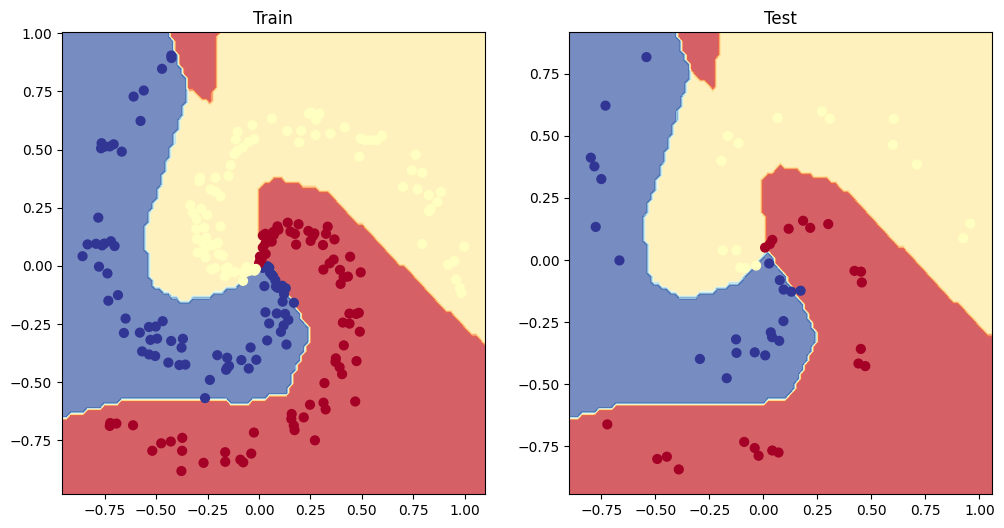

In [208]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(multimodel_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(multimodel_0, X_test, y_test)

In [209]:
# Make predictions
multimodel_0.eval()
with torch.inference_mode():
    y_logits = multimodel_0(X_test)

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)